# Data Story

What is the likelihood of seeing some exciting action during a baseball game? A common criticism of baseball is the fact that for long stretches of time, nothing interesting happens on offense. For a casual fan, watching hitting is frequently more interesting than watching pitching and defense. If a fan tunes into a game at the start of an inning, which potential variables can he or she use to judge whether or not they will witness hits and runs for that particular inning?

The dataset used for this initial data exploration was obtained from Retrosheet's play-by-play event files (http://www.retrosheet.org/game.htm). The downloads may be parsed into .csv files using programs they provide. An alternative is to use R and a set of files known as Chadwick to parse a season's play-by-play data into a single .csv file, as detailed at http://isaacmiller.co/how-to-create-a-single-season-csv-of-retrosheet-play-by-play-data-pc/.  

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("D:/SB DATA/Retrosheets/data2016.csv")
data.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (65,66,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,GAME_ID,AWAY_TEAM_ID,INN_CT,BAT_HOME_ID,OUTS_CT,BALLS_CT,STRIKES_CT,PITCH_SEQ_TX,AWAY_SCORE_CT,...,REMOVED_FOR_PH_BAT_FLD_CD,PO1_FLD_CD,PO2_FLD_CD,PO3_FLD_CD,ASS1_FLD_CD,ASS2_FLD_CD,ASS3_FLD_CD,ASS4_FLD_CD,ASS5_FLD_CD,EVENT_ID
0,1,ANA201604040,CHN,1,0,0,1,0,BX,0,...,0,0,0,0,0,0,0,0,0,1
1,2,ANA201604040,CHN,1,0,0,0,0,X,0,...,0,3,0,0,6,0,0,0,0,2
2,3,ANA201604040,CHN,1,0,1,0,2,SFS,0,...,0,2,0,0,0,0,0,0,0,3
3,4,ANA201604040,CHN,1,0,2,1,1,BCX,0,...,0,0,0,0,0,0,0,0,0,4
4,5,ANA201604040,CHN,1,0,2,2,2,BSS*B1S,1,...,0,3,0,0,2,0,0,0,0,5


In [3]:
len(data)

190715

In [4]:
list(data)

['Unnamed: 0',
 'GAME_ID',
 'AWAY_TEAM_ID',
 'INN_CT',
 'BAT_HOME_ID',
 'OUTS_CT',
 'BALLS_CT',
 'STRIKES_CT',
 'PITCH_SEQ_TX',
 'AWAY_SCORE_CT',
 'HOME_SCORE_CT',
 'BAT_ID',
 'BAT_HAND_CD',
 'RESP_BAT_ID',
 'RESP_BAT_HAND_CD',
 'PIT_ID',
 'PIT_HAND_CD',
 'RESP_PIT_ID',
 'RESP_PIT_HAND_CD',
 'POS2_FLD_ID',
 'POS3_FLD_ID',
 'POS4_FLD_ID',
 'POS5_FLD_ID',
 'POS6_FLD_ID',
 'POS7_FLD_ID',
 'POS8_FLD_ID',
 'POS9_FLD_ID',
 'BASE1_RUN_ID',
 'BASE2_RUN_ID',
 'BASE3_RUN_ID',
 'EVENT_TX',
 'LEADOFF_FL',
 'PH_FL',
 'BAT_FLD_CD',
 'BAT_LINEUP_ID',
 'EVENT_CD',
 'BAT_EVENT_FL',
 'AB_FL',
 'H_FL',
 'SH_FL',
 'SF_FL',
 'EVENT_OUTS_CT',
 'DP_FL',
 'TP_FL',
 'RBI_CT',
 'WP_FL',
 'PB_FL',
 'FLD_CD',
 'BATTEDBALL_CD',
 'BUNT_FL',
 'FOUL_FL',
 'BATTEDBALL_LOC_TX',
 'ERR_CT',
 'ERR1_FLD_CD',
 'ERR1_CD',
 'ERR2_FLD_CD',
 'ERR2_CD',
 'ERR3_FLD_CD',
 'ERR3_CD',
 'BAT_DEST_ID',
 'RUN1_DEST_ID',
 'RUN2_DEST_ID',
 'RUN3_DEST_ID',
 'BAT_PLAY_TX',
 'RUN1_PLAY_TX',
 'RUN2_PLAY_TX',
 'RUN3_PLAY_TX',
 'RUN1_SB_FL',
 

For now, the 2016 MLB season is selected to be investigated. There are 190,715 plays, and 98 features as detailed at http://www.retrosheet.org/datause.txt.  

A few features are selected to form a smaller data frame to work with. Some additional fields are added to improve processing efficiency.

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
subset = data[['GAME_ID','AWAY_TEAM_ID','INN_CT','LEADOFF_FL','BAT_HOME_ID','AWAY_SCORE_CT','HOME_SCORE_CT','BAT_LINEUP_ID','H_FL']]
subset['HOME_TEAM_ID'] = subset['GAME_ID'].astype(str).str[:3]
subset = subset[['GAME_ID','AWAY_TEAM_ID','HOME_TEAM_ID','INN_CT','LEADOFF_FL','BAT_HOME_ID','AWAY_SCORE_CT',\
                 'HOME_SCORE_CT','BAT_LINEUP_ID','H_FL']]
subset.head()

,GAME_ID,AWAY_TEAM_ID,HOME_TEAM_ID,INN_CT,LEADOFF_FL,BAT_HOME_ID,AWAY_SCORE_CT,HOME_SCORE_CT,BAT_LINEUP_ID,H_FL
0,ANA201604040,CHN,ANA,1,True,0,0,0,1,2
1,ANA201604040,CHN,ANA,1,False,0,0,0,2,0
2,ANA201604040,CHN,ANA,1,False,0,0,0,3,0
3,ANA201604040,CHN,ANA,1,False,0,0,0,4,1
4,ANA201604040,CHN,ANA,1,False,0,1,0,5,0


In [7]:
np.unique(subset['HOME_TEAM_ID'])

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE',
       'COL', 'DET', 'HOU', 'KCA', 'LAN', 'MIA', 'MIL', 'MIN', 'NYA',
       'NYN', 'OAK', 'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TBA',
       'TEX', 'TOR', 'WAS'], dtype=object)

As an initial instance, we will investigate the data for one team. First, extract all plays where the Dodgers ('LAN') were batting, and set a new field that indicates whether they are the home team. Then, compile the data by inning and produce some visualizations.

In [8]:
LAN = subset[((subset.AWAY_TEAM_ID == 'LAN') & (subset.BAT_HOME_ID == 0)) | ((subset.HOME_TEAM_ID == 'LAN') \
                                                                             & (subset.BAT_HOME_ID == 1))]

In [10]:
home = LAN['HOME_TEAM_ID'] == 'LAN'
LAN['HOME_FL'] = home
LAN = LAN.reset_index(drop= True)
LAN.head()

,GAME_ID,AWAY_TEAM_ID,HOME_TEAM_ID,INN_CT,LEADOFF_FL,BAT_HOME_ID,AWAY_SCORE_CT,HOME_SCORE_CT,BAT_LINEUP_ID,H_FL,HOME_FL
0,ANA201605180,LAN,ANA,1,True,0,0,0,1,0,False
1,ANA201605180,LAN,ANA,1,False,0,0,0,2,0,False
2,ANA201605180,LAN,ANA,1,False,0,0,0,3,0,False
3,ANA201605180,LAN,ANA,2,True,0,0,1,4,0,False
4,ANA201605180,LAN,ANA,2,False,0,0,1,5,0,False


In [11]:
prev_runs = 0
prev_play = 0
runs = []
leadoff_pos = []
inn = []
hits = []
inn_hits = 0
for row in LAN.itertuples():    
    if row.LEADOFF_FL == True:
        leadoff_pos.append(row.BAT_LINEUP_ID)
        if row.INN_CT < 10:
            inn.append(row.INN_CT)
        else:
            inn.append('10+')
        
        if row.Index == 0:
            continue
        
        hits.append(inn_hits)
        inn_hits = 0
        
        if row.INN_CT == 1:
            runs.append(prev_play-prev_runs)
            prev_runs = 0            
        else:
            if row.HOME_FL == True:
                runs.append(row.HOME_SCORE_CT - prev_runs)
                prev_runs = row.HOME_SCORE_CT
            else:
                runs.append(row.AWAY_SCORE_CT - prev_runs)
                prev_runs = row.AWAY_SCORE_CT
    
    if row.HOME_FL == True:
        prev_play = row.HOME_SCORE_CT
    else:
        prev_play = row.AWAY_SCORE_CT
    
    if (row.H_FL > 0):
        inn_hits += 1
        
    if row.Index == (len(LAN)-1):
        runs.append(prev_play-prev_runs)
        hits.append(inn_hits)

In [12]:
sum(runs)

717

In [13]:
innings = pd.DataFrame({'Leadoff': leadoff_pos, 'Runs': runs, 'Inning': inn, 'Hits': hits})
innings.head()

,Hits,Inning,Leadoff,Runs
0,0,1,1,0
1,0,2,4,0
2,0,3,7,0
3,2,4,1,1
4,2,5,7,0


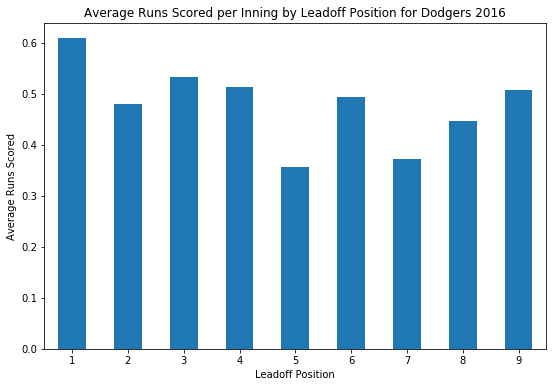

In [16]:
means = innings.groupby('Leadoff').mean()

fig = means['Runs'].plot(kind='bar',rot=0,legend=False,figsize=(9,6))
plt.xlabel('Leadoff Position')
plt.ylabel('Average Runs Scored')
plt.title('Average Runs Scored per Inning by Leadoff Position for Dodgers 2016')

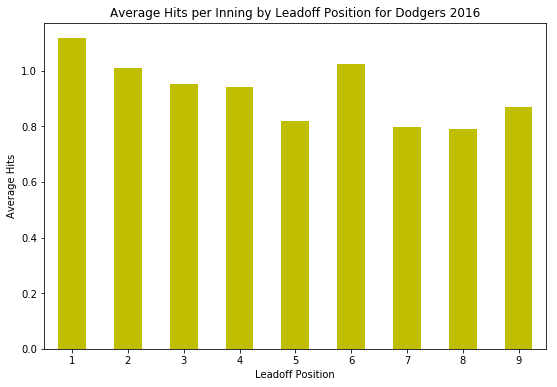

In [17]:
means = innings.groupby('Leadoff').mean()

fig = means['Hits'].plot(kind='bar',rot=0,legend=False,figsize=(9,6),color='y')
plt.xlabel('Leadoff Position')
plt.ylabel('Average Hits')
plt.title('Average Hits per Inning by Leadoff Position for Dodgers 2016')

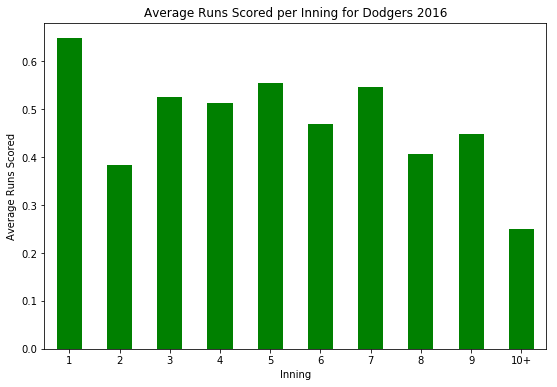

In [15]:
means = innings.groupby('Inning').mean()

fig = means['Runs'].plot(kind='bar',rot=0,legend=False,figsize=(9,6),color = 'g')
plt.xlabel('Inning')
plt.ylabel('Average Runs Scored')
plt.title('Average Runs Scored per Inning for Dodgers 2016')

Now, more robust code is produced to quickly generate plots for specific teams depending on what is saved as the teams of interest.  

First, plots can be made to represent data of the whole league. Then, plots can also be produced to compare the differences between National League and American League teams, since in the AL the pitcher does not hit and is replaced with a designated hitter. Different subsets of teams can be selected by modifying what is defined as the "leagues" and/or "teams" variable.

In [20]:
AL = ['ANA','BAL','BOS','CHA','CLE','DET','HOU','KCA','MIN','NYA','OAK','SEA','TBA','TEX','TOR']
NL = ['ARI','ATL','CHN','CIN','COL','LAN','MIA','MIL','NYN','PHI','PIT','SDN','SFN','SLN','WAS']
leagues = [AL,NL]
league_names = ['AL','NL']
teams = AL + NL

In [22]:
team_means = pd.DataFrame()
pos = 0
for team in teams:
    bat = subset[((subset.AWAY_TEAM_ID == team) & (subset.BAT_HOME_ID == 0)) | ((subset.HOME_TEAM_ID == team) \
                                                                                 & (subset.BAT_HOME_ID == 1))]
    home = bat['HOME_TEAM_ID'] == team
    bat['HOME_FL'] = home
    bat = bat.reset_index(drop= True)

    prev_runs = 0
    prev_play = 0
    runs = []
    leadoff_pos = []
    inn = []
    for row in bat.itertuples():    
        if row.LEADOFF_FL == True:
            leadoff_pos.append(row.BAT_LINEUP_ID)

            if row.INN_CT < 10:
                inn.append(row.INN_CT)
            else:
                inn.append('10+')

            if row.Index == 0:
                continue

            if row.INN_CT == 1:
                runs.append(prev_play-prev_runs)
                prev_runs = 0            
            else:
                if row.HOME_FL == True:
                    runs.append(row.HOME_SCORE_CT - prev_runs)
                    prev_runs = row.HOME_SCORE_CT
                else:
                    runs.append(row.AWAY_SCORE_CT - prev_runs)
                    prev_runs = row.AWAY_SCORE_CT

        if row.HOME_FL == True:
            prev_play = row.HOME_SCORE_CT
        else:
            prev_play = row.AWAY_SCORE_CT

        if row.Index == (len(bat)-1):
            runs.append(prev_play-prev_runs)
    
    innings = pd.DataFrame({'Leadoff': leadoff_pos, team: runs, 'Inning':inn})
    means = innings.groupby('Leadoff').mean()
    
    team_means = pd.concat([team_means,means],axis=1)
    
    innings = pd.DataFrame({'Leadoff': leadoff_pos, 'Runs': runs, 'Inning':inn})
    if pos==0:
        inn_cts = innings.Leadoff.value_counts()
        sums = innings.groupby('Leadoff').sum()
    else:
        inn_cts = innings.Leadoff.value_counts() + inn_cts
        sums = innings.groupby('Leadoff').sum() + sums
    pos=1

In [24]:
sums['Innings'] = inn_cts
sums['mean'] = sums.Runs/sums.Innings
sums

,Runs,Innings,mean
Leadoff,,,
1,5109,9163,0.557568
2,2082,3685,0.564993
3,1939,3635,0.533425
4,2491,5228,0.476473
5,2180,4777,0.456353
6,1679,4185,0.401195
7,1843,4236,0.435080
8,2085,4399,0.473971
9,2082,4151,0.501566


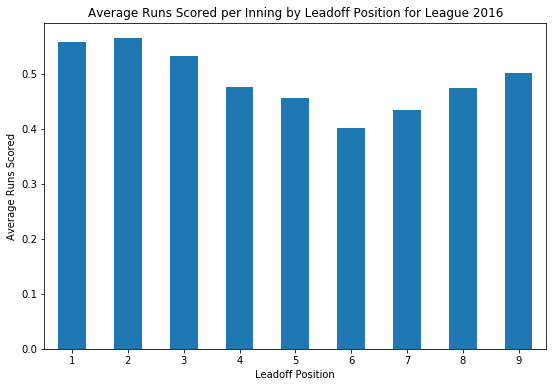

In [25]:
sums['mean'].plot(kind='bar',rot=0,legend=False,figsize=(9,6))
plt.xlabel('Leadoff Position')
plt.ylabel('Average Runs Scored')
plt.title('Average Runs Scored per Inning by Leadoff Position for League 2016')

In [30]:
teams = AL+NL
league_means = pd.DataFrame()
league_hits = pd.DataFrame()
league_runs_inn = pd.DataFrame()
league_hits_inn = pd.DataFrame()

lc = 0

for league in leagues:
    pos = 0
    for team in league:
        bat = subset[((subset.AWAY_TEAM_ID == team) & (subset.BAT_HOME_ID == 0)) | ((subset.HOME_TEAM_ID == team) \
                                                                                     & (subset.BAT_HOME_ID == 1))]
        home = bat['HOME_TEAM_ID'] == team
        bat['HOME_FL'] = home
        bat = bat.reset_index(drop= True)

        prev_runs = 0
        prev_play = 0
        runs = []
        leadoff_pos = []
        inn = []
        hits = []
        inn_hits = 0
        
        for row in bat.itertuples():    
            if row.LEADOFF_FL == True:
                leadoff_pos.append(row.BAT_LINEUP_ID)

                if row.INN_CT < 10:
                    inn.append(row.INN_CT)
                else:
                    inn.append('10+')

                if row.Index == 0:
                    continue

                hits.append(inn_hits)
                inn_hits = 0
        
                if row.INN_CT == 1:
                    runs.append(prev_play-prev_runs)
                    prev_runs = 0            
                else:
                    if row.HOME_FL == True:
                        runs.append(row.HOME_SCORE_CT - prev_runs)
                        prev_runs = row.HOME_SCORE_CT
                    else:
                        runs.append(row.AWAY_SCORE_CT - prev_runs)
                        prev_runs = row.AWAY_SCORE_CT

            if row.HOME_FL == True:
                prev_play = row.HOME_SCORE_CT
            else:
                prev_play = row.AWAY_SCORE_CT

            if (row.H_FL > 0):
                inn_hits += 1                
                
            if row.Index == (len(bat)-1):
                runs.append(prev_play-prev_runs)
                hits.append(inn_hits)
                

        innings = pd.DataFrame({'Leadoff': leadoff_pos, team: runs, 'Inning':inn})
        means = innings.groupby('Leadoff').mean()

        innings = pd.DataFrame({'Leadoff': leadoff_pos, 'Runs': runs, 'Inning':inn, 'Hits':hits})
        if pos==0:
            inn_cts = innings.Leadoff.value_counts()
            inn_tot = innings.Inning.value_counts()
            sums = innings.groupby('Leadoff').sum()
            gb_inn = innings.groupby('Inning').sum()
        else:
            inn_cts = innings.Leadoff.value_counts() + inn_cts
            inn_tot = innings.Inning.value_counts() + inn_tot
            sums = innings.groupby('Leadoff').sum() + sums
            gb_inn = innings.groupby('Inning').sum() + gb_inn
        pos=1

    
    sums['Innings'] = inn_cts
    sums['mean'] = sums.Runs/sums.Innings
    sums['Avg_hits'] = sums.Hits/sums.Innings
    league_means[league_names[lc]] = sums['mean']
    league_hits[league_names[lc]] = sums['Avg_hits']
    
    gb_inn['Total'] = inn_tot
    gb_inn['MeanRuns'] = gb_inn.Runs/gb_inn.Total
    gb_inn['MeanHits'] = gb_inn.Hits/gb_inn.Total
    league_runs_inn[league_names[lc]] = gb_inn['MeanRuns']
    league_hits_inn[league_names[lc]] = gb_inn['MeanHits']
    
    lc = 1
    

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5006: RuntimeWarning: unorderable types: numpy.ndarray() > str(), sort order is undefined for incomparable objects
  return_indexers=True)


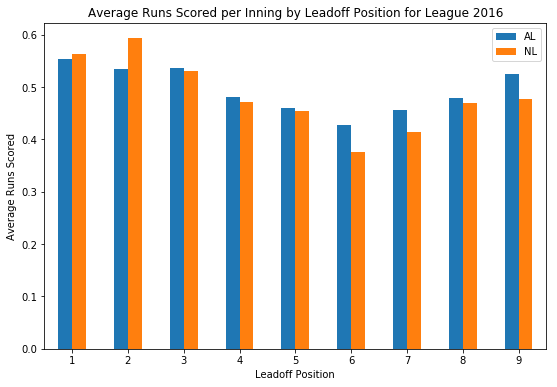

In [42]:
league_means.plot(kind='bar',rot=0,figsize=(9,6))
plt.xlabel('Leadoff Position')
plt.ylabel('Average Runs Scored')
plt.title('Average Runs Scored per Inning by Leadoff Position for League 2016')

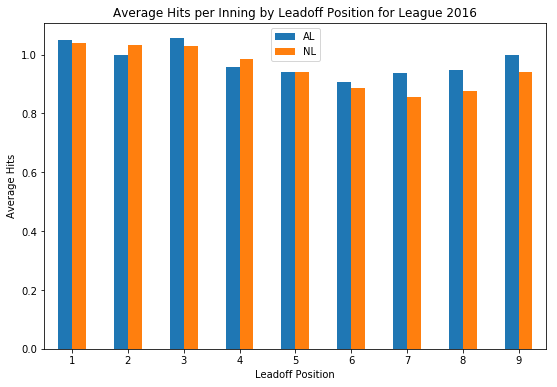

In [33]:
league_hits.plot(kind='bar',rot=0,figsize=(9,6))
plt.xlabel('Leadoff Position')
plt.ylabel('Average Hits')
plt.title('Average Hits per Inning by Leadoff Position for League 2016')

In [35]:
sums

,Hits,Runs,Innings,mean,Avg_hits
Leadoff,,,,,
1,4886,2642,4699,0.562247,1.039796
2,1956,1125,1896,0.593354,1.031646
3,1834,947,1783,0.531127,1.028603
4,2535,1214,2573,0.471823,0.985231
5,2289,1102,2430,0.453498,0.941975
6,1879,795,2117,0.375531,0.887577
7,1802,869,2103,0.413219,0.856871
8,1902,1017,2170,0.468664,0.876498
9,1885,957,2007,0.476831,0.939213


In [37]:
league_means

,AL,NL
Leadoff,,
1,0.552643,0.562247
2,0.534936,0.593354
3,0.535637,0.531127
4,0.480979,0.471823
5,0.459310,0.453498
6,0.427466,0.375531
7,0.456634,0.413219
8,0.479139,0.468664
9,0.524720,0.476831


In [38]:
league_hits

,AL,NL
Leadoff,,
1,1.048611,1.039796
2,0.998882,1.031646
3,1.055616,1.028603
4,0.957815,0.985231
5,0.940349,0.941975
6,0.905706,0.887577
7,0.937647,0.856871
8,0.947061,0.876498
9,0.996735,0.939213


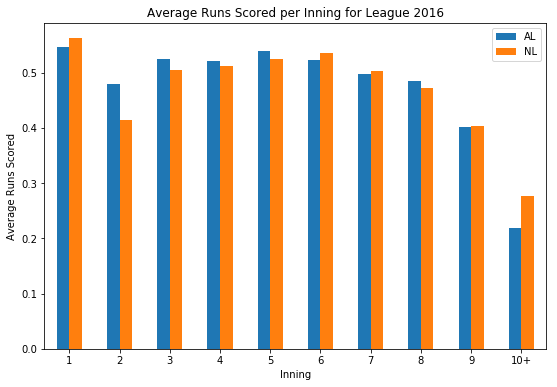

In [31]:
league_runs_inn.plot(kind='bar',rot=0,figsize=(9,6))
plt.xlabel('Inning')
plt.ylabel('Average Runs Scored')
plt.title('Average Runs Scored per Inning for League 2016')

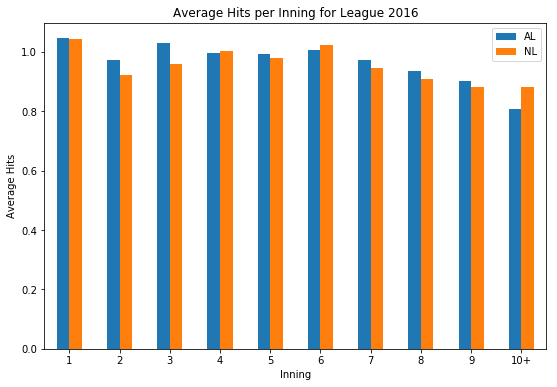

In [32]:
league_hits_inn.plot(kind='bar',rot=0,figsize=(9,6))
plt.xlabel('Inning')
plt.ylabel('Average Hits')
plt.title('Average Hits per Inning for League 2016')

In [39]:
gb_inn

,Hits,Leadoff,Runs,Total,MeanRuns,MeanHits
Inning,,,,,,
1,2532,2430,1366,2430,0.562140,1.041975
2,2240,12661,1007,2430,0.414403,0.921811
3,2332,13188,1225,2429,0.504323,0.960066
4,2436,10392,1243,2430,0.511523,1.002469
5,2379,12984,1273,2430,0.523868,0.979012
6,2484,11148,1300,2429,0.535200,1.022643
7,2292,12636,1221,2425,0.503505,0.945155
8,2197,11886,1144,2423,0.472142,0.906727
9,1666,9546,760,1887,0.402756,0.882883


In [40]:
league_runs_inn

,AL,NL
Inning,,
1,0.546129,0.562140
2,0.479835,0.414403
3,0.524455,0.504323
4,0.521185,0.511523
5,0.538493,0.523868
6,0.522044,0.535200
7,0.496492,0.503505
8,0.484936,0.472142
9,0.400749,0.402756


In [41]:
league_hits_inn

,AL,NL
Inning,,
1,1.045717,1.041975
2,0.973251,0.921811
3,1.028360,0.960066
4,0.996298,1.002469
5,0.992178,0.979012
6,1.006593,1.022643
7,0.972348,0.945155
8,0.933553,0.906727
9,0.899946,0.882883


From the visualizations, for hits per inning, there is a slight drop for the second inning before going up a little into the mid-innings, then trending down from there. The same could be said for runs per inning. Unsurprisingly, the presence of the DH allowed the AL teams to have slightly better offensive numbers.  

When considering leadoff positions, there was a similar trend in that starting with the top of the order led to more runs, and leading off with the 6th spot led to fewer runs. Number of hits also followed this trend, although the effect is less obvious. Surprisingly, NL teams did not average the fewest amount of runs for when the 9 hitter, usually the pitcher, leads off. Even if the first batter is almost a free out, the top of the lineup is still able to produce runs better than if the bottom of the order was due up.